In [152]:
!pip3 install plotnine
import pandas as pd
from plotnine import *


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [153]:
df_player_plays = pd.read_csv('player_play.csv')
df_players = pd.read_csv('players.csv')

In [154]:
df_receivers = df_players[df_players['position'] == 'WR']
df_receivers.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
7,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson
10,33234,6-0,205,1985-09-09,UCLA,WR,Matt Slater
27,37077,6-4,210,1988-07-31,Georgia,WR,A.J. Green
29,37079,6-3,220,1989-02-08,Alabama,WR,Julio Jones
38,37139,5-10,192,1990-08-22,Kentucky,WR,Randall Cobb


In [155]:
# All plays of receivers during 2025 season
df_receiver_plays = pd.merge(df_player_plays, df_receivers, on='nflId')
df_receiver_plays

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,height,weight,birthDate,collegeName,position,displayName
0,2022090800,56,42489,BUF,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,6-0,191,1993-11-29,Maryland,WR,Stefon Diggs
1,2022090800,56,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie
2,2022090800,56,52536,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-3,213,1999-03-01,Central Florida,WR,Gabe Davis
3,2022090800,80,42489,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-0,191,1993-11-29,Maryland,WR,Stefon Diggs
4,2022090800,80,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40935,2022110700,3707,52721,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-4,199,1997-01-15,Ohio State,WR,Binjimen Victor
40936,2022110700,3740,43415,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-1,203,1994-09-21,Florida,WR,Demarcus Robinson
40937,2022110700,3787,46160,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-2,210,1996-01-07,Central Florida,WR,Tre'Quan Smith
40938,2022110700,3787,53098,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-2,204,1998-03-27,Tennessee,WR,Marquez Callaway


In [156]:
df_receiver_plays['routeRan'].value_counts()

routeRan
GO        6139
HITCH     4312
CROSS     2719
IN        2595
OUT       2438
POST      2110
SLANT     1731
CORNER    1272
FLAT       869
SCREEN     803
ANGLE       37
WHEEL       20
Name: count, dtype: int64

In [157]:
df_receiver_plays.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,height,weight,birthDate,collegeName,position,displayName
0,2022090800,56,42489,BUF,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,6-0,191,1993-11-29,Maryland,WR,Stefon Diggs
1,2022090800,56,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie
2,2022090800,56,52536,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-3,213,1999-03-01,Central Florida,WR,Gabe Davis
3,2022090800,80,42489,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-0,191,1993-11-29,Maryland,WR,Stefon Diggs
4,2022090800,80,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie


In [158]:
# columns = ['gameId', 'playId', 'nflId', 'teamAbbr', 'hadPassReception', 'receivingYards', 'wasTargettedReceiver', 
#            'yardageGainedAfterTheCatch', 'wasRunningRoute', 'routeRan', 'displayName']

columns = ['hadPassReception', 'receivingYards', 'wasTargettedReceiver', 
           'yardageGainedAfterTheCatch', 'wasRunningRoute', 'routeRan', 'displayName']

df_receiver_info = df_receiver_plays[columns]

In [159]:
df_receiver_info

,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,wasRunningRoute,routeRan,displayName
0,1,6,1,1,1.0,IN,Stefon Diggs
1,0,0,0,0,1.0,OUT,Isaiah McKenzie
2,0,0,0,0,1.0,GO,Gabe Davis
3,0,0,0,0,NaN,NaN,Stefon Diggs
4,0,0,0,0,NaN,NaN,Isaiah McKenzie
...,...,...,...,...,...,...,...
40935,0,0,0,0,NaN,NaN,Binjimen Victor
40936,0,0,0,0,NaN,NaN,Demarcus Robinson
40937,0,0,0,0,NaN,NaN,Tre'Quan Smith
40938,0,0,0,0,NaN,NaN,Marquez Callaway


In [160]:
df_receiver_grouped = df_receiver_info.groupby('displayName').agg({
    'hadPassReception': 'sum',
    'receivingYards': 'sum',
    'wasTargettedReceiver': 'sum',
    'yardageGainedAfterTheCatch': 'sum',
    'wasRunningRoute': 'sum'
}).reset_index()

df_receiver_grouped = df_receiver_grouped.rename(columns={
    "hadPassReception": "total_receptions",
    "receivingYards": "total_receiving_yards",
    "wasTargettedReceiver": "total_targets",
    "yardageGainedAfterTheCatch": "total_YAC",
    "wasRunningRoute": "total_routes_run"
})

In [161]:
df_receiver_grouped["catch_rate"] = df_receiver_grouped["total_receptions"] / df_receiver_grouped["total_targets"]
df_receiver_grouped["yards_per_reception"] = df_receiver_grouped["total_receiving_yards"] / df_receiver_grouped["total_receptions"]
df_receiver_grouped["YAC_per_reception"] = df_receiver_grouped["total_YAC"] / df_receiver_grouped["total_receptions"]

In [162]:
df_receiver_grouped.sort_values(by='total_receiving_yards', ascending=False).head(10)

,displayName,total_receptions,total_receiving_yards,total_targets,total_YAC,total_routes_run,catch_rate,yards_per_reception,YAC_per_reception
215,Tyreek Hill,73,1052,96,320,271.0,0.760417,14.410959,4.383562
104,Jaylen Waddle,47,814,70,299,270.0,0.671429,17.319149,6.361702
37,Cooper Kupp,70,800,91,405,296.0,0.769231,11.428571,5.785714
112,Justin Jefferson,55,774,79,327,302.0,0.696203,14.072727,5.945455
192,Stefon Diggs,54,711,75,205,242.0,0.720000,13.166667,3.796296
52,Davante Adams,47,647,84,231,282.0,0.559524,13.765957,4.914894
0,A.J. Brown,40,642,65,239,224.0,0.615385,16.050000,5.975000
200,Terry McLaurin,37,601,60,214,317.0,0.616667,16.243243,5.783784
110,JuJu Smith-Schuster,44,582,60,310,285.0,0.733333,13.227273,7.045455
154,Mike Evans,42,579,65,115,300.0,0.646154,13.785714,2.738095


In [163]:
df_receiver_grouped['catch_rate'].fillna(0, inplace=True)
df_receiver_grouped['YAC_per_reception'].fillna(0, inplace=True)
df_receiver_grouped['yards_per_reception'].fillna(0, inplace=True)

df_receiver_grouped.shape[0]


/var/folders/q3/ylx__0pd5njcllf5gh6ppydm0000gn/T/ipykernel_36515/3398372929.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/var/folders/q3/ylx__0pd5njcllf5gh6ppydm0000gn/T/ipykernel_36515/3398372929.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

224

In [164]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Define feature and target variables
X = df_receiver_grouped[['total_receptions', 'total_targets', 'total_YAC', 
                         'total_routes_run', 'catch_rate', 'YAC_per_reception', 'yards_per_reception']]
Y = df_receiver_grouped['total_receiving_yards']

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Cross-validation setup (KFold)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validation scores
cv_results = cross_val_score(pipeline, X, Y, cv=k_fold, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(pipeline, X, Y, cv=k_fold, scoring='r2')
rmse_scores = np.sqrt(-cv_results)

# Print cross-validation results
print(f"Cross-validation RMSE scores: {rmse_scores}")
print(f"CV R^2 Scores: {r2_scores}")
print(f"Average RMSE: {rmse_scores.mean():.2f} receiving yards")
print(f"Average R^2: {r2_scores.mean():.2f}")

# Fit the model using the entire dataset
pipeline.fit(X, Y)

# Get model coefficients (weights)
weights = pipeline.named_steps['linearregression'].coef_

# Print feature names and corresponding weights
print(X.columns)
print(weights)

# Make predictions on the entire dataset
df_receiver_grouped['predicted_receiving_yards'] = pipeline.predict(X)


Cross-validation RMSE scores: [53.7493007  38.07041304 50.84715472 43.79651777 28.86967271]
CV R^2 Scores: [0.92640497 0.95498622 0.95458911 0.94177552 0.97422774]
Average RMSE: 43.07 receiving yards
Average R^2: 0.95
Index(['total_receptions', 'total_targets', 'total_YAC', 'total_routes_run',
       'catch_rate', 'YAC_per_reception', 'yards_per_reception'],
      dtype='object')
[114.76588271  51.5937838   39.02103556 -11.4093968   -9.05895462
 -11.65320358  29.22890965]


In [166]:
df_sorted = df_receiver_grouped.sort_values(by='predicted_receiving_yards', ascending=False).head(25)
df_sorted[['displayName', 'predicted_receiving_yards', 'total_receiving_yards']]

,displayName,predicted_receiving_yards,total_receiving_yards
215,Tyreek Hill,908.650802,1052
37,Cooper Kupp,899.718943,800
112,Justin Jefferson,730.544495,774
192,Stefon Diggs,659.851593,711
104,Jaylen Waddle,651.215384,814
52,Davante Adams,640.713252,647
152,Michael Pittman,640.158956,543
110,JuJu Smith-Schuster,589.733270,582
0,A.J. Brown,559.458584,642
86,Ja'Marr Chase,554.745328,529


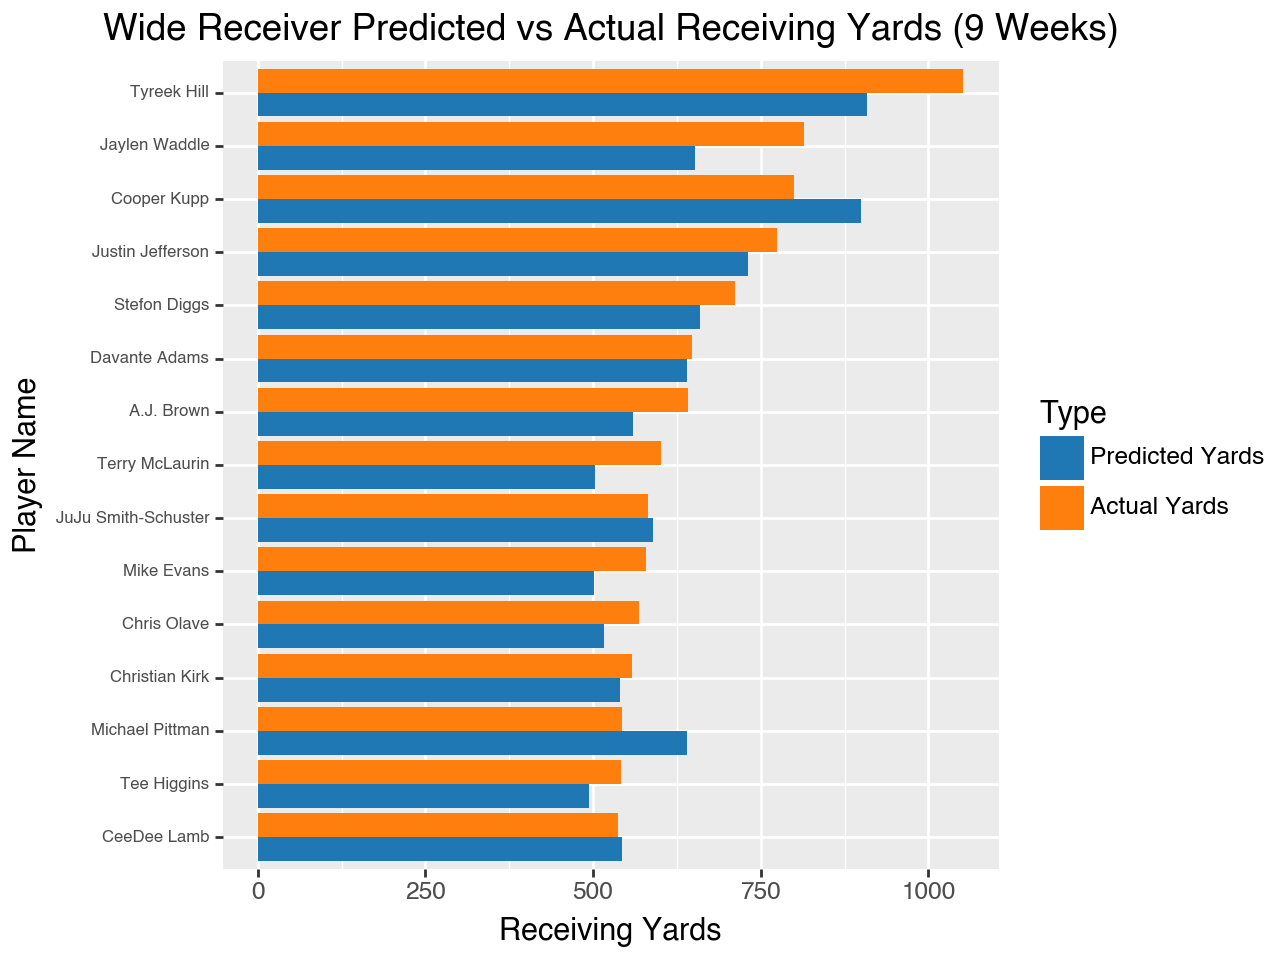

In [167]:

df_sorted = df_receiver_grouped.sort_values(by='total_receiving_yards', ascending=False).head(15)

df_sorted['displayName'] = pd.Categorical(
    df_sorted['displayName'],
    categories=df_sorted['displayName'].tolist()[::-1],
    ordered=True
)

(
    ggplot(df_sorted.melt(id_vars=['displayName'], value_vars=['predicted_receiving_yards', 'total_receiving_yards']),
           aes(x='displayName', y='value', fill='variable')) + 
    geom_col(position="dodge") +
    coord_flip() + 
    labs(x='Player Name', y='Receiving Yards', title='Wide Receiver Predicted vs Actual Receiving Yards (9 Weeks)', fill='Type') + 
    scale_fill_manual(values={'predicted_receiving_yards': '#1f77b4', 'total_receiving_yards': '#ff7f0e'},
                      labels={'predicted_receiving_yards': 'Predicted Yards', 
                              'total_receiving_yards': 'Actual Yards'}) + 
    theme(axis_text_y=element_text(vjust=0.5, hjust=1, size=6, lineheight=1.5))
)


In [168]:
from sklearn.metrics import r2_score


y_actual = np.array(df_sorted['total_receiving_yards'])
y_pred  = np.array(df_sorted['predicted_receiving_yards'])

r2 = r2_score(y_actual, y_pred)
r2

0.6595067777474019